# DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION #GRIPJAN21¶¶
    Author: Rupak Dey
    TASK 5: find out the most successful teams, players and factors contributing win or loss of a team.
    Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

In [104]:
import numpy as np 
import pandas as pd  

import matplotlib.pyplot as plt 
import seaborn as sns    

plt.style.use("fivethirtyeight")
sns.set_style("darkgrid") 

# Data = Matches

# Understanding the data

In [105]:
matches = pd.read_csv("matches.csv")

In [106]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [5]:
matches.shape

(756, 18)

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
# Getting the frequency of most man of the match awards
matches['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
                  ..
TA Boult           1
SB Wagh            1
HH Gibbs           1
R McLaren          1
Umar Gul           1
Name: player_of_match, Length: 226, dtype: int64

In [8]:
# Getting the top 5 players with most man of the match awards
matches['player_of_match'].value_counts()[0:5]

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
Name: player_of_match, dtype: int64

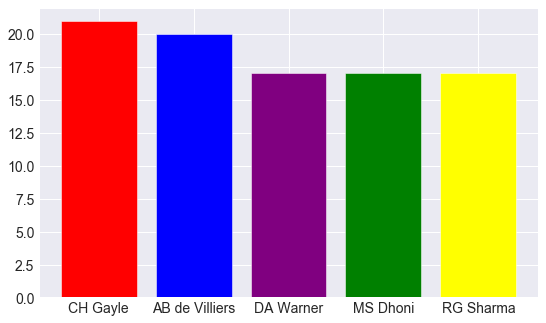

In [10]:
#Barplot to show the top 5 players with most man of the match awards
plt.figure(figsize=(8,5))
plt.bar(list(matches['player_of_match'].value_counts()[0:5].keys()), list(matches['player_of_match'].value_counts()[0:5]), color=['red', 'blue', 'purple', 'green', 'yellow'])
plt.show()

In [11]:
# Finding out the number of toss wins w.r.t each team
matches['toss_winner'].value_counts()


Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [12]:
# Extracting the records where a team won batting first
batting_first = matches[matches['win_by_runs']!=0]
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


In [101]:
# Finding out the number of wins w.r.t each team after batting first
batting_first['winner'].value_counts().sum()

337

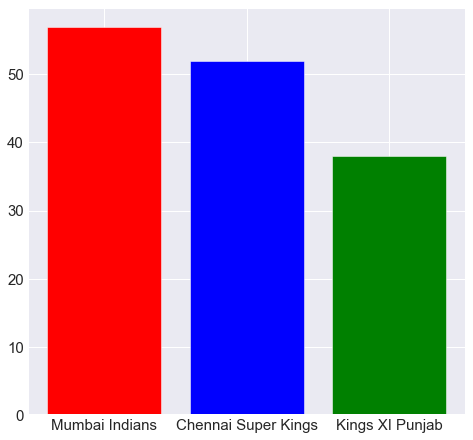

In [14]:
# Making a bar plot for top 3 teams with most wins after batting first
plt.figure(figsize=(7,7))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()), list(batting_first['winner'].value_counts()[0:3]), color=['red', 'blue', 'green'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

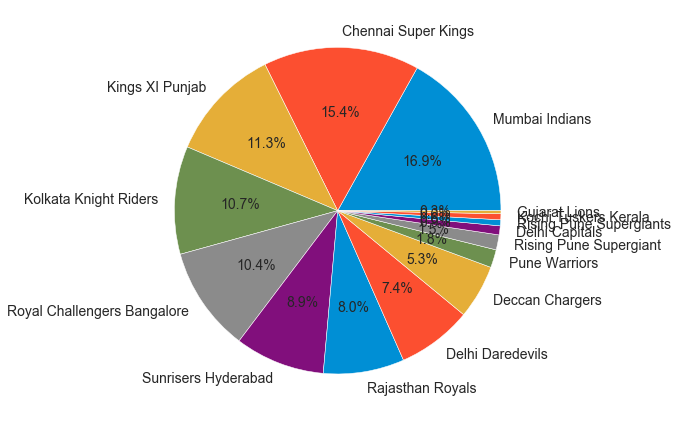

In [15]:
# Making a pie chart
plt.figure(figsize=(10,7))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

In [16]:
# Extracting those records where a team has won after batting second
batting_second = matches[matches['win_by_wickets']!=0]
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [103]:
# Finding out the frequency of number of wins w.r.t each time after batting second
batting_second['winner'].value_counts().sum()

406

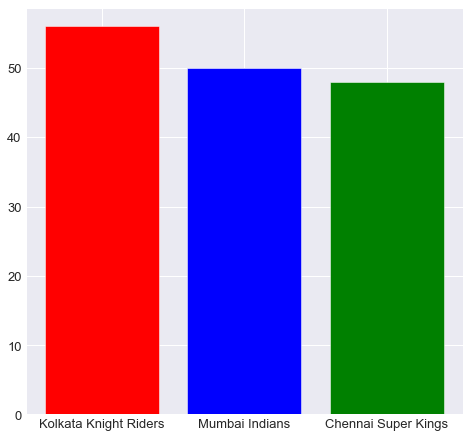

In [18]:
# Making a bar plot for top 3 teams with most wins after batting second
plt.figure(figsize=(7,7))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()), list(batting_second['winner'].value_counts()[0:3]), color=['red', 'blue', 'green'])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [19]:
# Looking at the number of matches played each season
matches['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [20]:
# Looking at the number of matches played in each city
matches['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Abu Dhabi           7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [21]:
# Finding out how many times a team has won the match after winning the toss 
np.sum(matches['toss_winner']==matches['winner'])

393

In [97]:
ss = matches['toss_winner'] == matches['winner']
ss.groupby(ss).size()


False    363
True     393
dtype: int64

In [22]:
matches['city'].nunique()

32

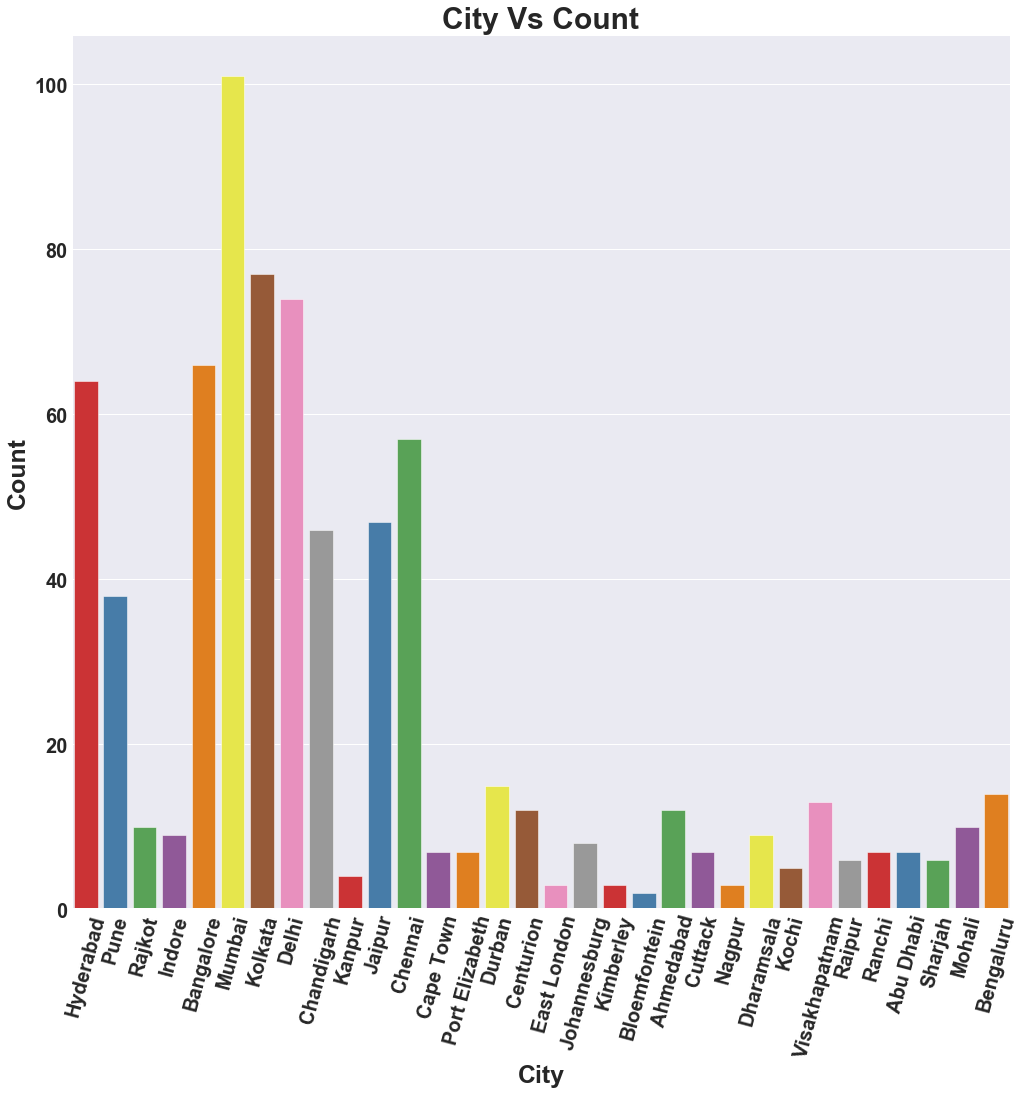

In [23]:
plt.figure(figsize=(15,15))

cols = ['yellowgreen', 'lightcoral','gold']

sns.countplot(matches['city'],data=matches, palette='Set1')

plt.xlabel('City', fontsize=25, fontweight='bold')
plt.ylabel('Count', fontsize=25, fontweight='bold')

plt.title('City Vs Count', fontweight="bold", size=30)

plt.xticks(rotation=75, fontweight="bold", fontsize=20)
plt.yticks(fontweight="bold", fontsize=20)

plt.show()

# team1

In [24]:
matches['team1'].nunique()

15

In [ ]:
plt.figure(figsize=(15,15))



sns.countplot(matches['team1'],data=matches, palette='Set1')

plt.xlabel('team1', fontsize=25, fontweight='bold')
plt.ylabel('count', fontsize=25, fontweight='bold')

plt.title('team1 Vs Count', fontweight="bold", size=30)

plt.xticks(rotation=60, fontweight="bold", size=20)
plt.yticks(fontweight="bold", size=20)

plt.show()

# team2

In [28]:
matches['team2'].nunique()

15

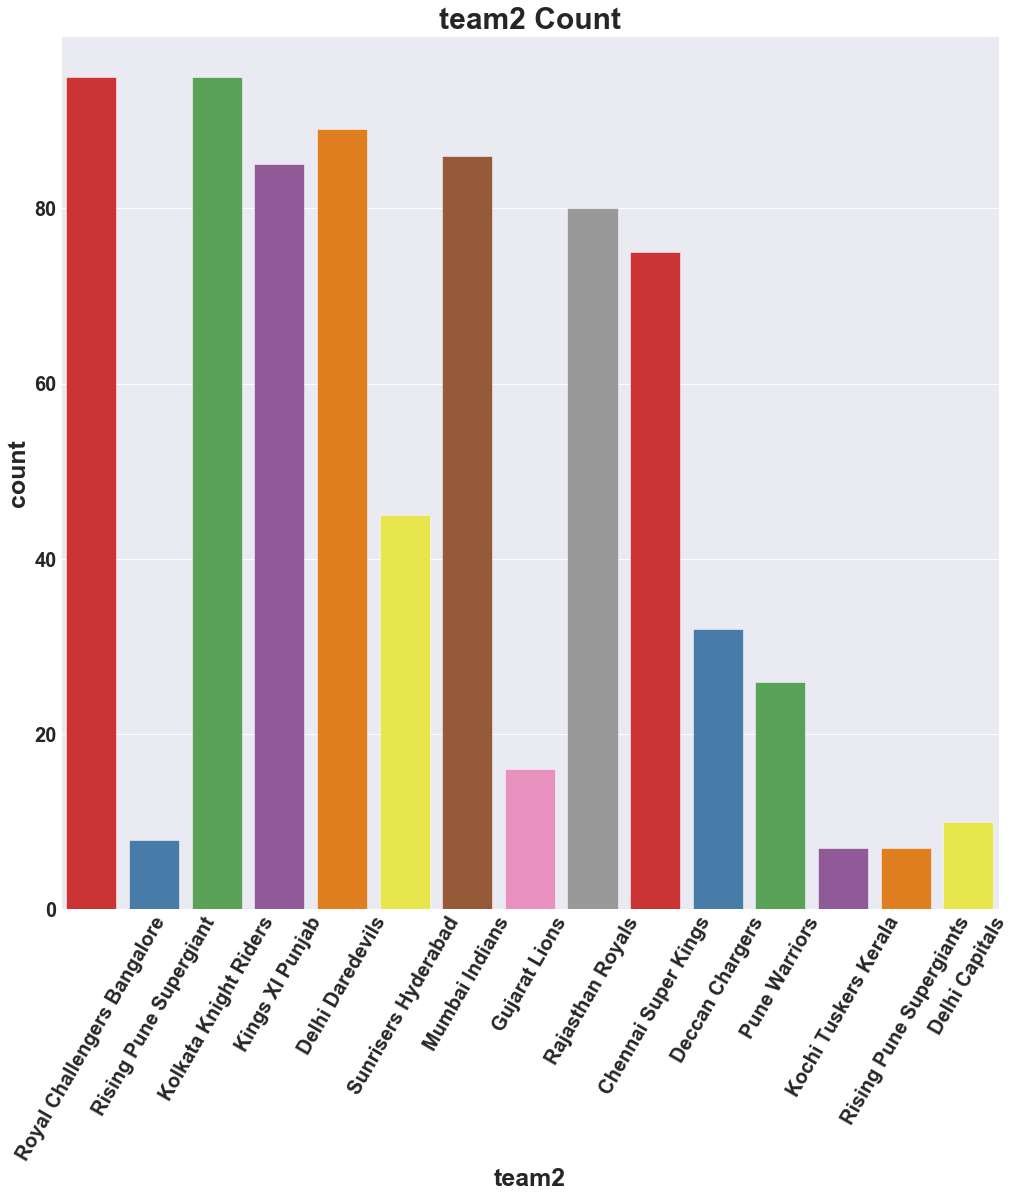

In [29]:
plt.figure(figsize=(15,15))

sns.countplot(matches['team2'], data=matches, palette='Set1')

plt.xlabel('team2', fontsize=25, fontweight='bold')
plt.ylabel('count', fontsize=25, fontweight='bold')

plt.title('team2 Count', fontweight="bold", size=30)

plt.xticks(rotation=60, fontweight="bold", size=20)
plt.yticks(fontweight="bold", size=20)

plt.show()

# toss_winner

In [30]:
matches['toss_winner'].nunique()

15

In [31]:
matches['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

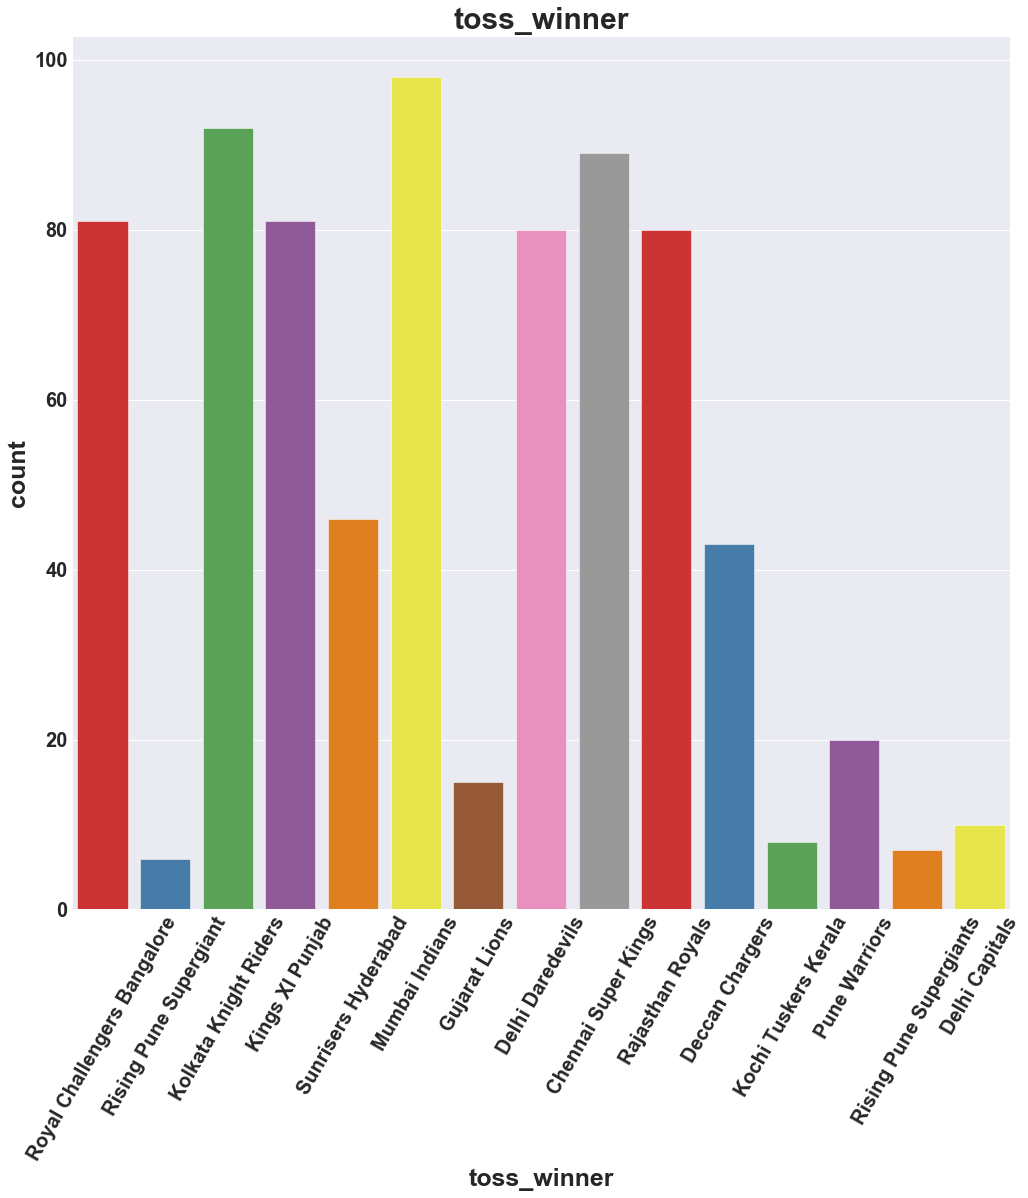

In [32]:
plt.figure(figsize=(15,15))

sns.countplot(matches['toss_winner'], data=matches, palette='Set1')

plt.xlabel('toss_winner', fontsize=25, fontweight='bold')
plt.ylabel('count', fontsize=25, fontweight='bold')

plt.title('toss_winner', fontweight="bold", size=30)

plt.xticks(rotation=60, fontweight="bold", size=20)
plt.yticks(fontweight="bold", size=20)

plt.show()

# winner

In [33]:
matches['winner'].nunique()

15

In [34]:
matches['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

# player_of_match

In [35]:
matches['player_of_match'].nunique()


226

In [36]:
matches['player_of_match'].unique()

array(['Yuvraj Singh', 'SPD Smith', 'CA Lynn', 'GJ Maxwell', 'KM Jadhav',
       'Rashid Khan', 'N Rana', 'AR Patel', 'SV Samson', 'JJ Bumrah',
       'SP Narine', 'KA Pollard', 'AJ Tye', 'RV Uthappa', 'CJ Anderson',
       'BA Stokes', 'NM Coulter-Nile', 'B Kumar', 'CH Gayle',
       'KS Williamson', 'JC Buttler', 'SK Raina', 'MJ McClenaghan',
       'MS Dhoni', 'HM Amla', 'G Gambhir', 'LH Ferguson', 'KH Pandya',
       'Sandeep Sharma', 'DA Warner', 'RG Sharma', 'Mohammed Shami',
       'RA Tripathi', 'RR Pant', 'JD Unadkat', 'LMP Simmons', 'DR Smith',
       'S Dhawan', 'MM Sharma', 'SS Iyer', 'WP Saha', 'KK Nair',
       'Mohammed Siraj', 'AT Rayudu', 'HV Patel', 'Washington Sundar',
       'KV Sharma', 'BB McCullum', 'MEK Hussey', 'MF Maharoof',
       'MV Boucher', 'DJ Hussey', 'SR Watson', 'V Sehwag', 'ML Hayden',
       'YK Pathan', 'KC Sangakkara', 'JDP Oram', 'AC Gilchrist',
       'SM Katich', 'ST Jayasuriya', 'GD McGrath', 'SE Marsh',
       'SA Asnodkar', 'R Vinay Kumar', 

# venue

In [37]:
matches['venue'].nunique()

41

In [38]:

matches['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

# Clean the data

    Missing Values

In [39]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [40]:
#As umpire3 column contains too much missing values so we are dropping it.
matches.drop('umpire3', axis=1, inplace=True)

# Find Outliers

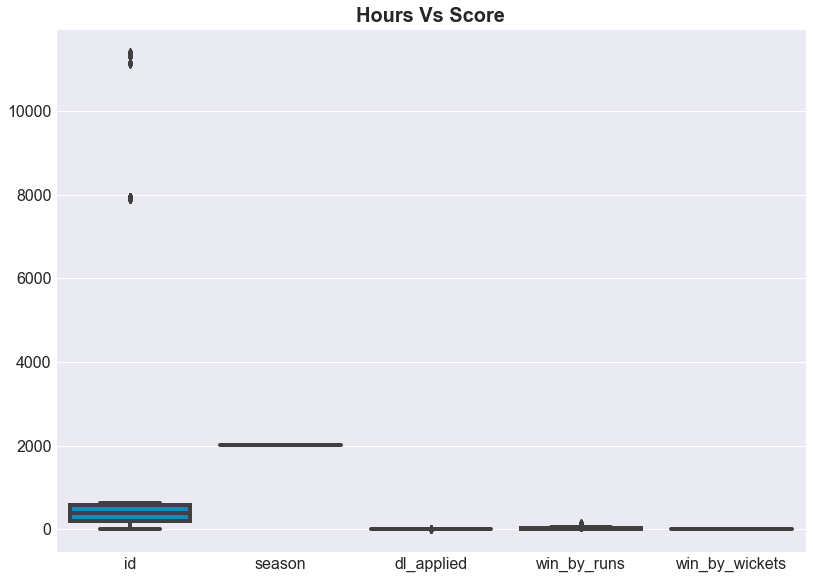

In [41]:
plt.figure(figsize=(12,9))
sns.boxplot(data=matches)

plt.title("Hours Vs Score", fontsize=20, fontweight='bold')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

# Correlation

In [42]:
matches.corr()['win_by_runs']

id               -0.039403
season           -0.037529
dl_applied       -0.016349
win_by_runs       1.000000
win_by_wickets   -0.560420
Name: win_by_runs, dtype: float64

# Heatmap

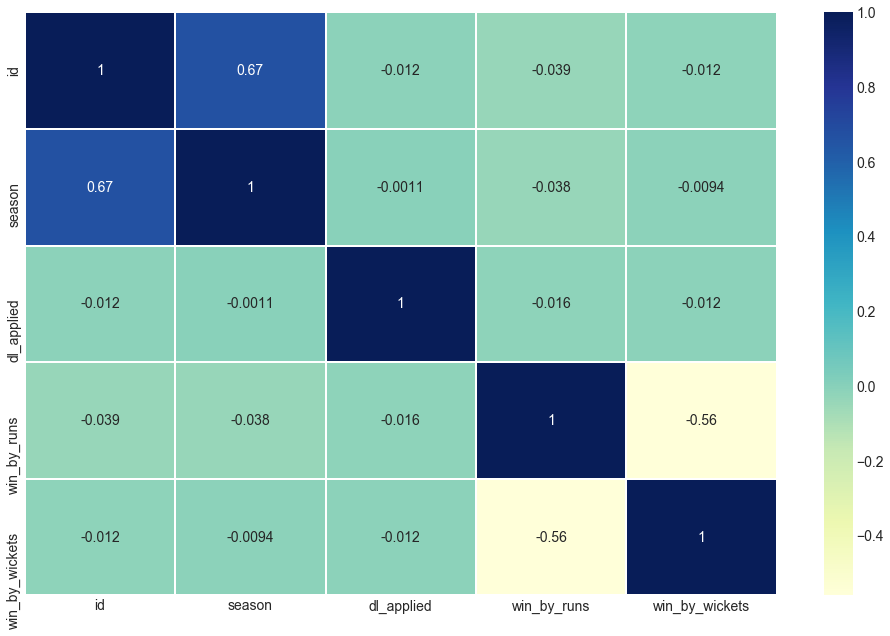

In [43]:
plt.figure(figsize=(15,10)) 
sns.heatmap(matches.corr(), annot=True, linecolor = 'white', linewidths = 1, cmap="YlGnBu")
plt.show()

# Univariate analysis

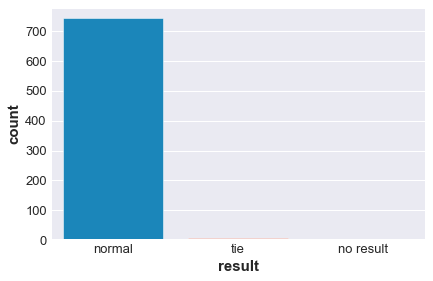

In [46]:
sns.countplot(matches['result'],data=matches)

plt.xlabel('result', fontsize=15, fontweight='bold')
plt.ylabel('count', fontsize=15, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

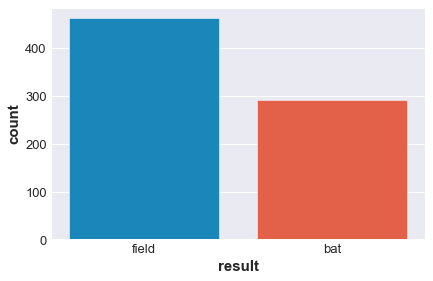

In [47]:
sns.countplot('toss_decision', data=matches)

plt.xlabel('result', fontsize=15, fontweight='bold')
plt.ylabel('count', fontsize=15, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# Bivariate Analysis

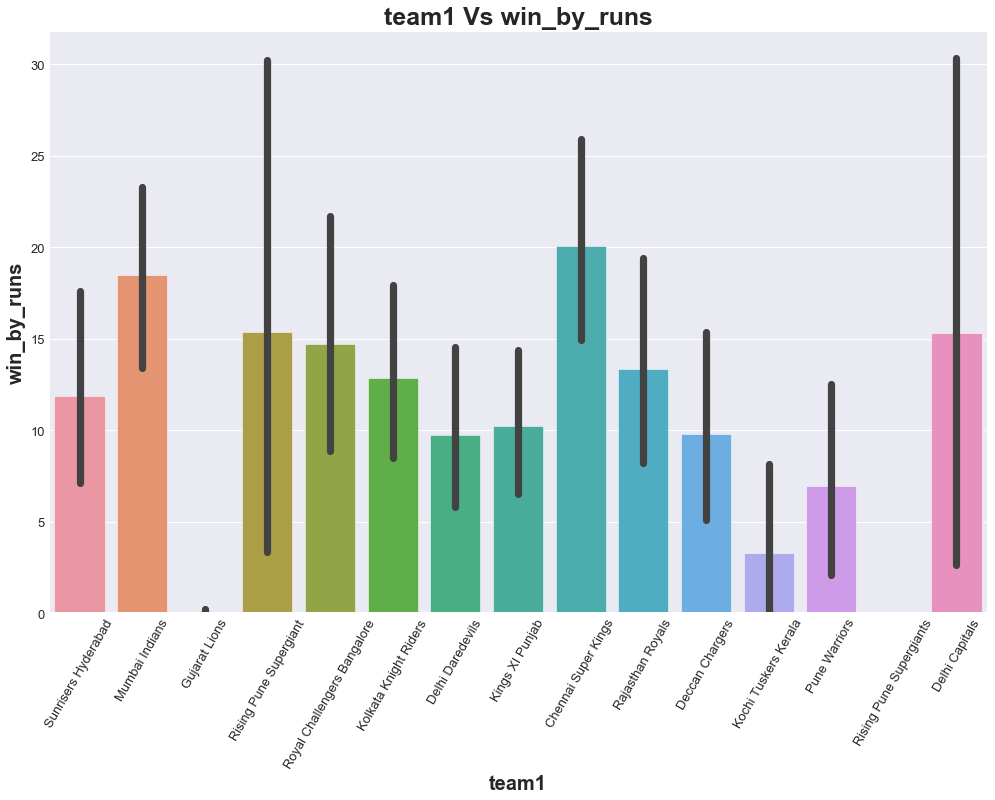

In [48]:
plt.figure(figsize=(15,10))
sns.barplot(x=matches['team1'], y=matches['win_by_runs'], data=matches)

plt.title('team1 Vs win_by_runs', fontsize=25, fontweight='bold')

plt.xlabel('team1', fontsize=20, fontweight='bold')
plt.ylabel('win_by_runs', fontsize=20, fontweight='bold')

plt.xticks(rotation=60, fontsize=13)
plt.yticks(fontsize=13)

plt.show()

In [49]:
matches['city'].isnull().sum()

7

In [50]:
matches['city'].fillna('Dubai', inplace = True)

In [51]:
matches['city'].nunique()

33

In [52]:
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

In [53]:
# Number of matches
matches['id'].max()


11415

In [54]:
#Total no of seasons
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [55]:
# Number of seasons
len(matches['season'].unique())

12

In [56]:
#Team won by maximum runs

matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

In [57]:
#Team won by minimum runs
matches.iloc[matches['win_by_runs'].idxmin()]

id                                                       2
season                                                2017
city                                                  Pune
date                                            2017-04-06
team1                                       Mumbai Indians
team2                               Rising Pune Supergiant
toss_winner                         Rising Pune Supergiant
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                              Rising Pune Supergiant
win_by_runs                                              0
win_by_wickets                                           7
player_of_match                                  SPD Smith
venue              Maharashtra Cricket Association Stadium
umpire1                                     A Nand Kishore
umpire2                                             S Ra

In [58]:
#Team won by maximum wickets:
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

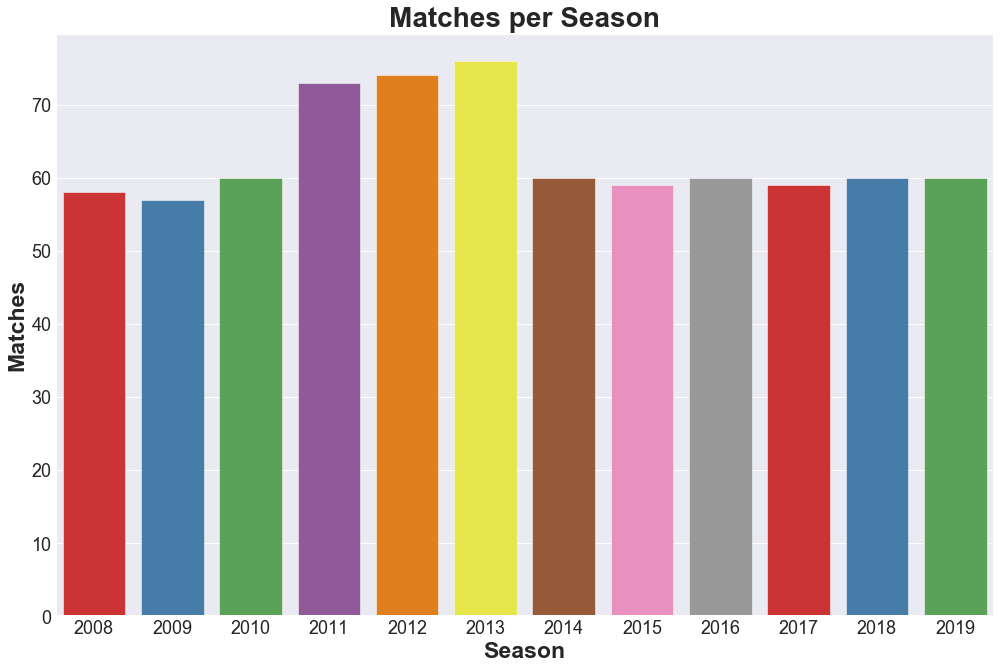

In [59]:
# Matches per season
plt.subplots(figsize=(15,10))

sns.countplot(x = 'season', data = matches, palette='Set1')

plt.title('Matches per Season', fontsize=28, fontweight='bold')

plt.xlabel('Season', fontsize=23, fontweight='bold')
plt.ylabel('Matches', fontsize=23, fontweight='bold')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

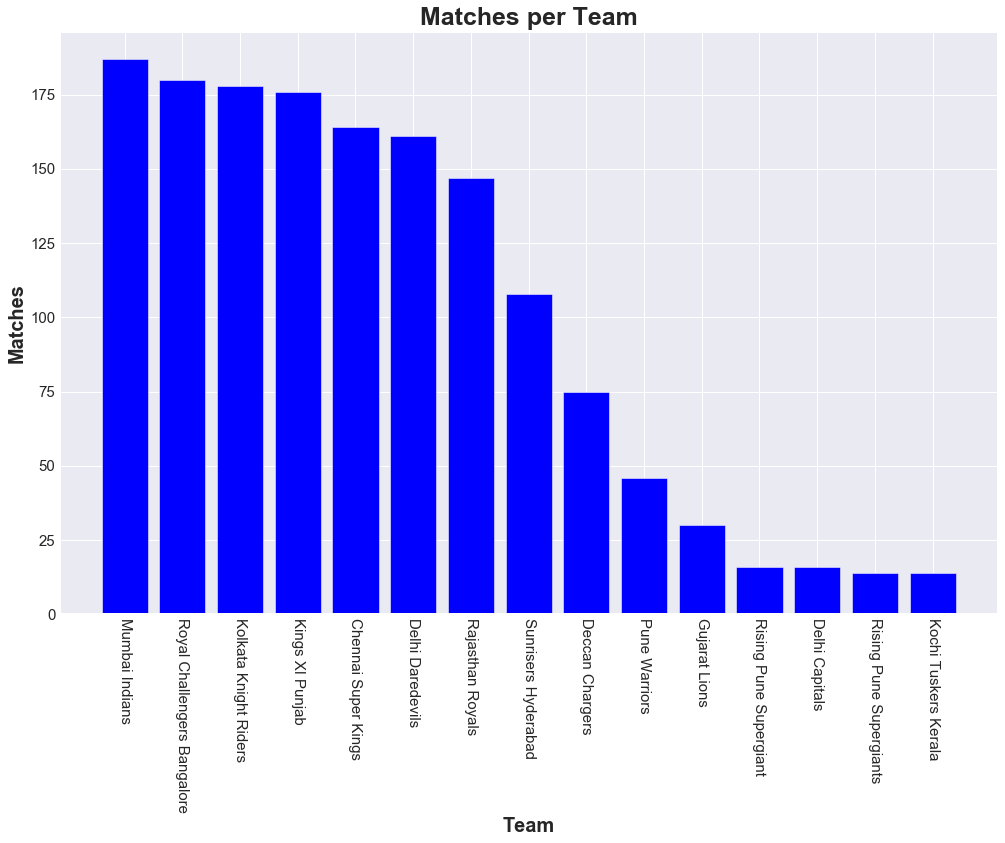

In [60]:

# Matches per team
num_matches = pd.concat([matches['team1'], matches['team2']])
num_matches = num_matches.value_counts()

plt.figure(figsize=(15,10))

plt.bar(x=num_matches.index, height=num_matches.values, color='blue')

plt.title('Matches per Team', fontsize=25, fontweight='bold')

plt.xlabel('Team', fontsize=20, fontweight='bold')
plt.ylabel('Matches', fontsize=20, fontweight='bold')

plt.xticks(rotation=270, fontsize=15)
plt.yticks(fontsize=15)
    
plt.show()

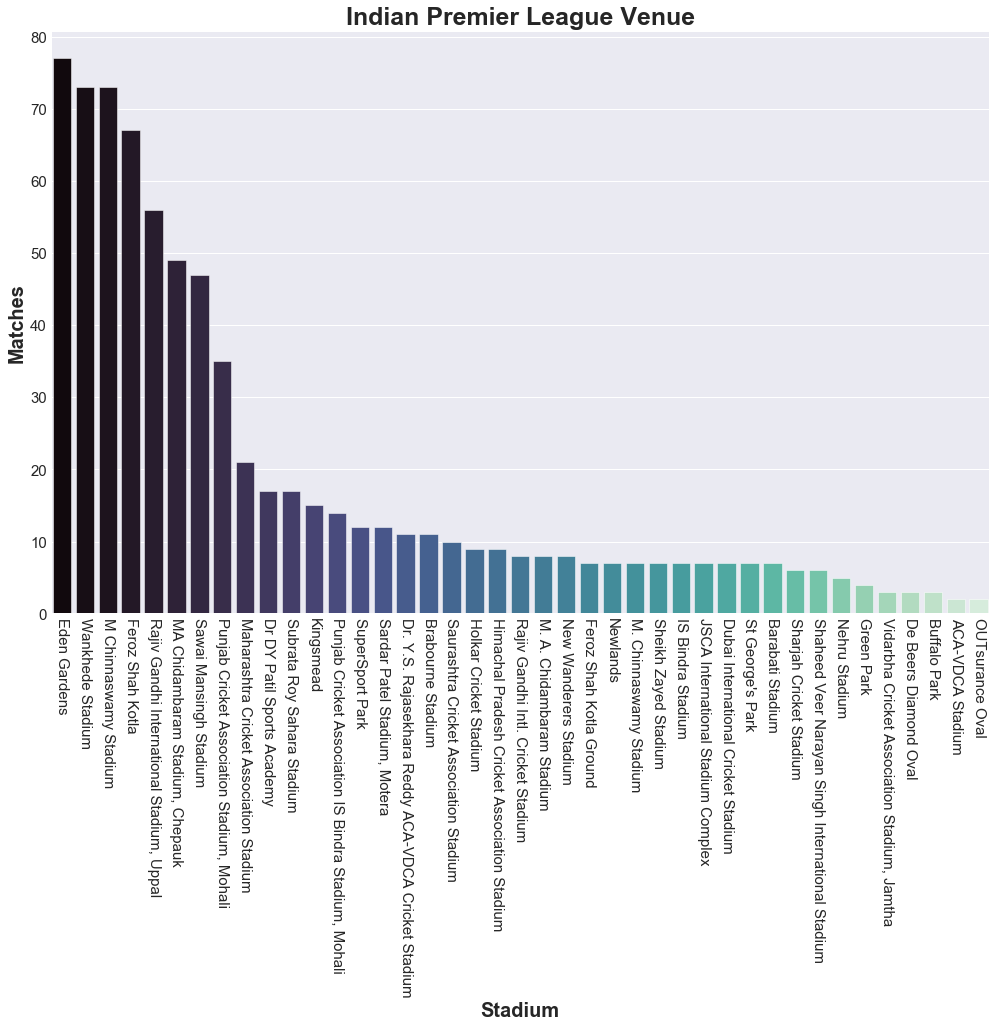

In [61]:
# Visualization of how many matches were played in which venue.
plt.subplots(figsize=(15,10))

sns.countplot(x ='venue', data=matches, palette='mako', order=matches['venue'].value_counts().index)

plt.title('Indian Premier League Venue',fontsize=25, fontweight='bold')

plt.xlabel('Stadium', fontsize=20, fontweight='bold')
plt.ylabel('Matches', fontsize=20, fontweight='bold')

plt.xticks(rotation=270, fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [66]:
import warnings                              # To ignore any warnings
warnings.filterwarnings("ignore")

In [67]:
season_winner = matches.drop_duplicates('season', keep='last')
seasonw = season_winner[['season', 'winner']]
seasonw.sort_values('season',inplace=True)
seasonw.reset_index(inplace=True, drop=True)

In [68]:
print(seasonw)

    season                 winner
0     2008       Rajasthan Royals
1     2009        Deccan Chargers
2     2010    Chennai Super Kings
3     2011    Chennai Super Kings
4     2012  Kolkata Knight Riders
5     2013         Mumbai Indians
6     2014  Kolkata Knight Riders
7     2015         Mumbai Indians
8     2016    Sunrisers Hyderabad
9     2017         Mumbai Indians
10    2018    Chennai Super Kings
11    2019         Mumbai Indians


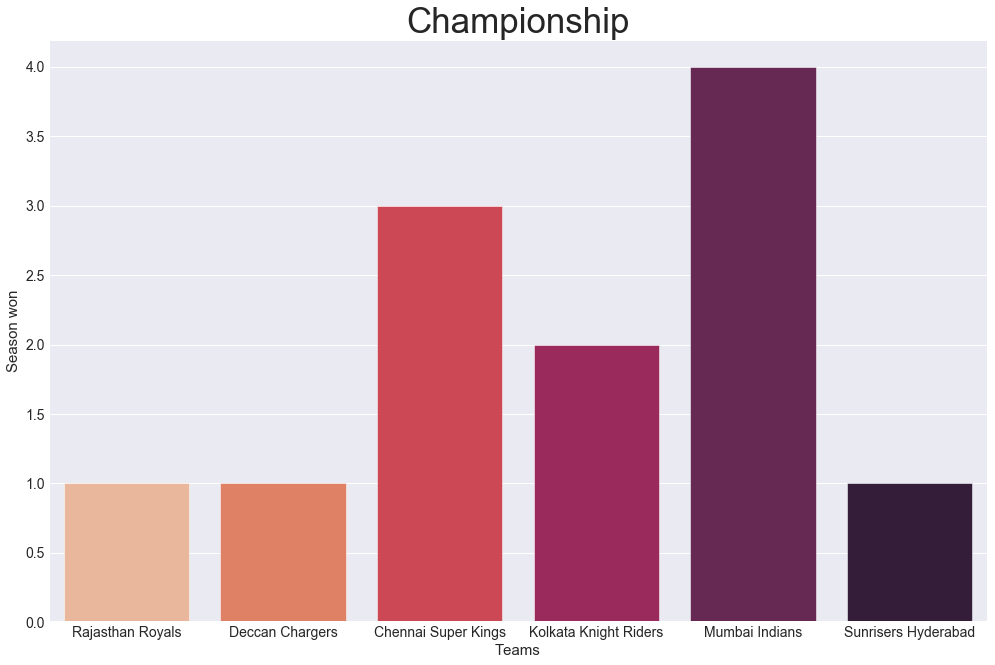

In [71]:
# Championships per Team
plt.subplots(figsize=(15,10))

sns.countplot('winner', data = seasonw, palette = 'rocket_r')

plt.title('Championship',fontsize=35)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Season won',fontsize=15)

plt.show()

In [72]:
top_players = matches['player_of_match'].value_counts()[:10]

In [73]:
top_players

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

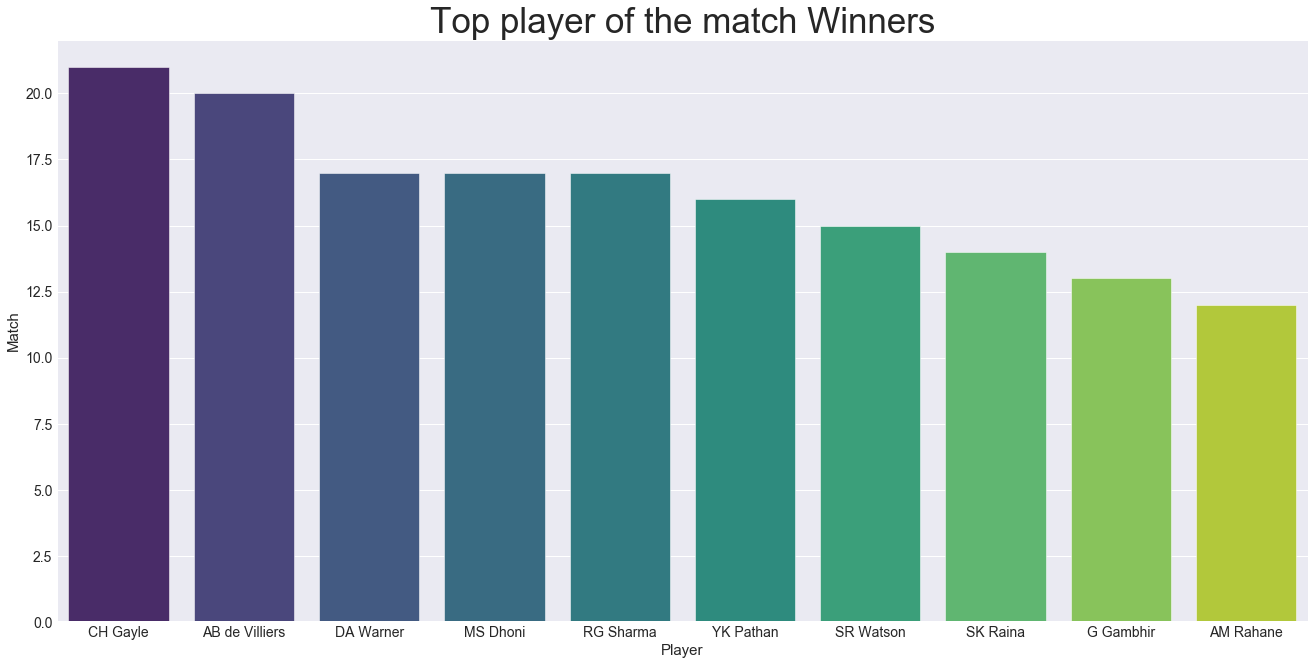

In [74]:

# Top 10 players
plt.figure(figsize=(20,10))

sns.barplot(x=top_players.index, y=top_players.values, palette="viridis")

plt.title('Top player of the match Winners', fontsize=35)
plt.xlabel('Player', fontsize=15)
plt.ylabel('Match', fontsize=15)

plt.show()

# Data = Deliveries

# Understanding the data

In [75]:
deliveries = pd.read_csv("deliveries.csv")

In [76]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [77]:
deliveries.shape

(179078, 21)

In [80]:
deliveries.count()

match_id            179078
inning              179078
batting_team        179078
bowling_team        179078
over                179078
ball                179078
batsman             179078
non_striker         179078
bowler              179078
is_super_over       179078
wide_runs           179078
bye_runs            179078
legbye_runs         179078
noball_runs         179078
penalty_runs        179078
batsman_runs        179078
extra_runs          179078
total_runs          179078
player_dismissed      8834
dismissal_kind        8834
fielder               6448
dtype: int64

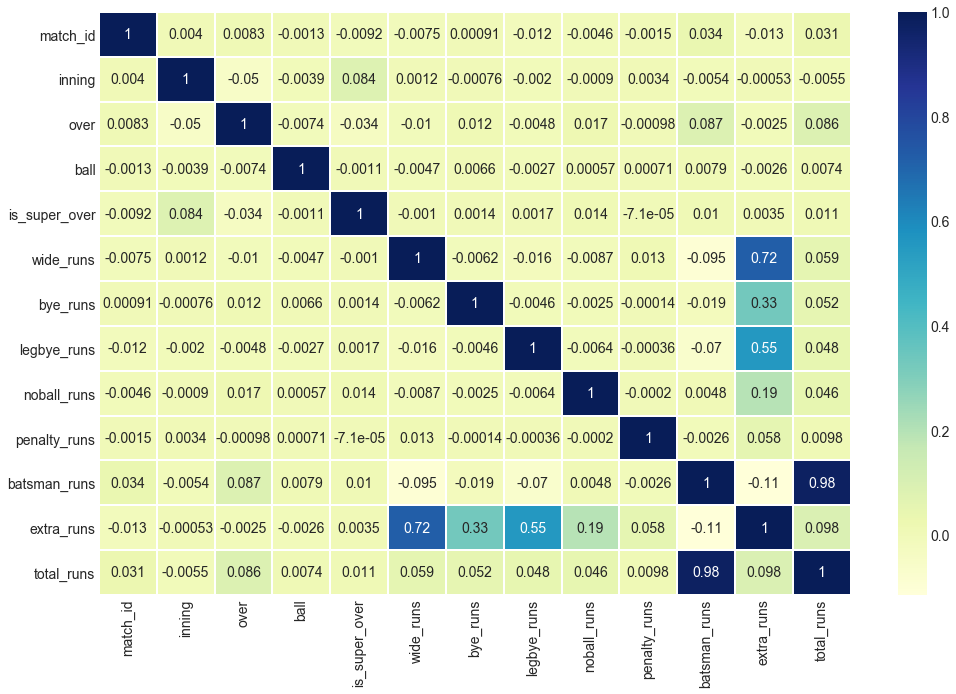

In [81]:
plt.figure(figsize=(15,10)) 
sns.heatmap(deliveries.corr(), annot=True, linecolor = 'white', linewidths = 1, cmap="YlGnBu")
plt.show()

# batting_team

In [82]:
deliveries['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

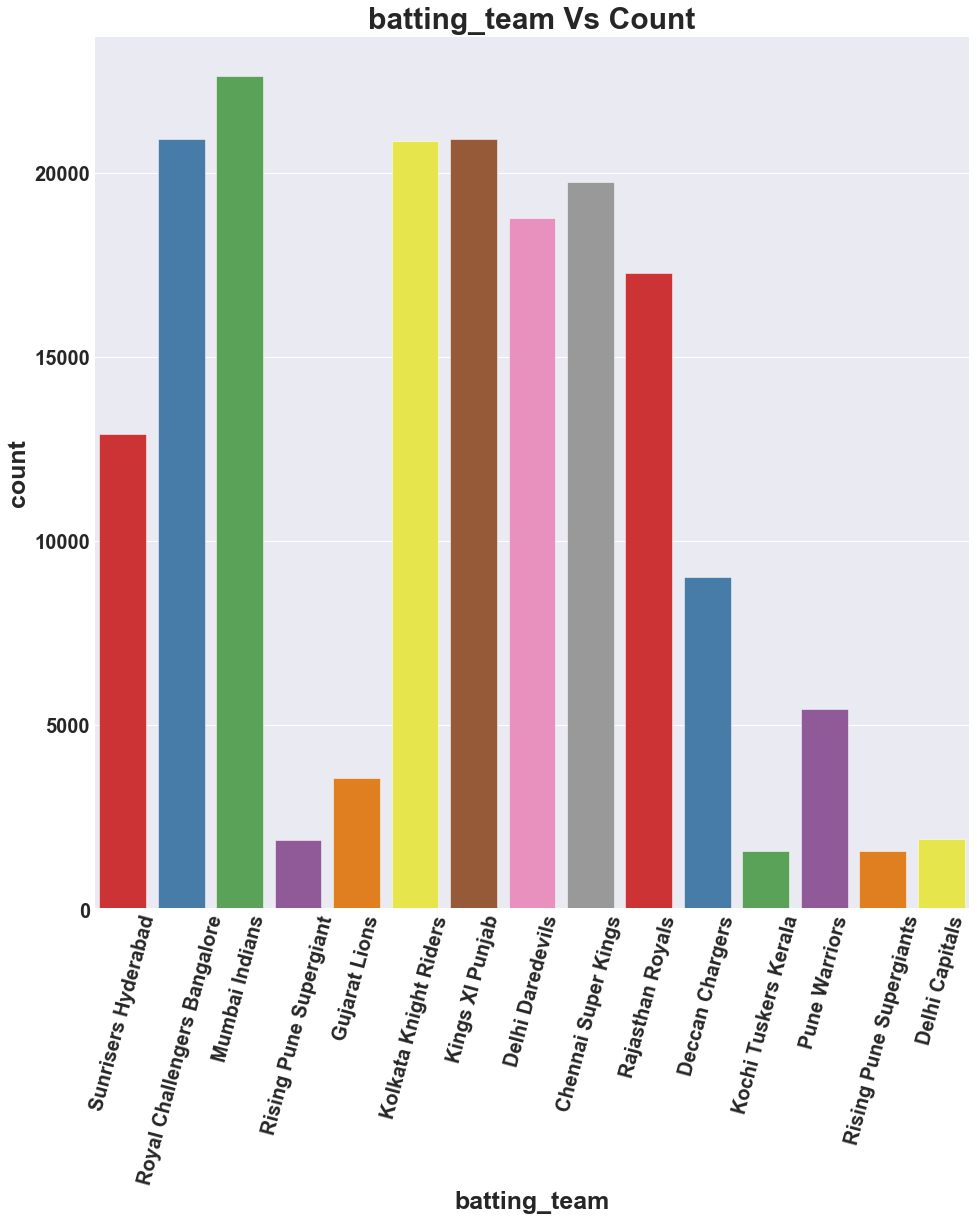

In [83]:

plt.figure(figsize=(14,15))

cols = ['yellowgreen', 'lightcoral','gold']

sns.countplot(deliveries['batting_team'], data=deliveries, palette='Set1')

plt.xlabel('batting_team', fontsize=25, fontweight='bold')
plt.ylabel('count', fontsize=25, fontweight='bold')

plt.title('batting_team Vs Count', fontweight="bold", size=30)

plt.xticks(rotation=75, fontweight="bold", size=20)
plt.yticks(fontweight="bold", size=20)

plt.show()

# bowling_team

In [84]:
deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

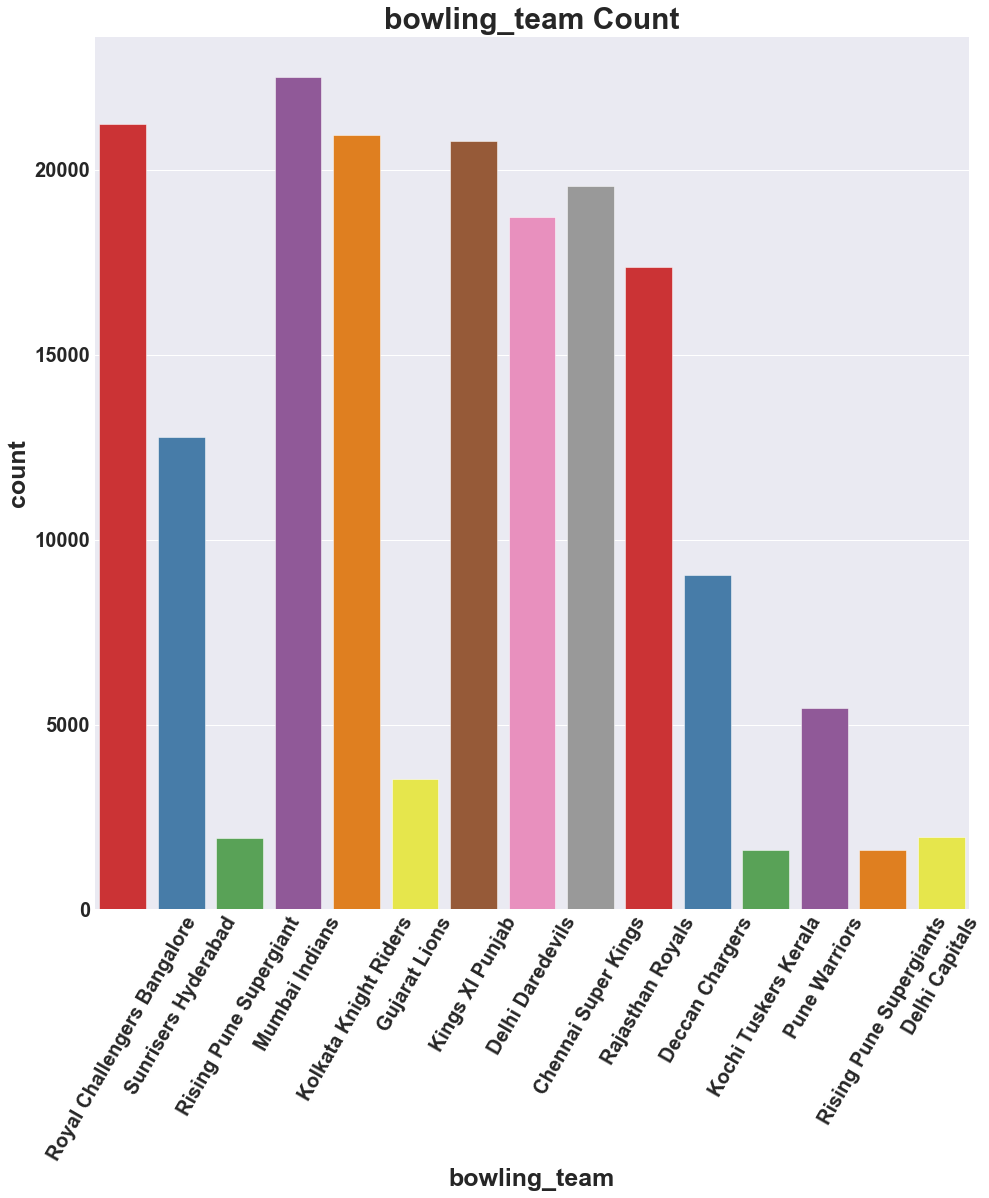

In [85]:
plt.figure(figsize=(14,15))

cols = ['yellowgreen', 'lightcoral', 'gold']

sns.countplot(deliveries['bowling_team'], data=deliveries, palette='Set1')

plt.xlabel('bowling_team', fontsize=25, fontweight='bold')
plt.ylabel('count', fontsize=25, fontweight='bold')

plt.title('bowling_team Count',fontweight="bold", size=30)

plt.xticks(rotation=60, fontweight="bold", size=20)
plt.yticks(fontweight="bold", size=20)

plt.show()

In [86]:
#Cleaning the data
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [87]:
# I want to analyze match b/n Sunrisers Hyderabad & Royal Challengers Bangalore
match_1 = deliveries[deliveries['match_id']==1]
match_1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [88]:
match_1.shape

(248, 21)

Here we can see that ther are 248 rows that means 8 balls have been extras because as there are 120 balls per innings so the the total should be 240 balls and here we can see 248 balls so thats why I came to this conclusion.

In [89]:
# Sunrisers Hyderabad
srh = match_1[match_1['inning']==1]

In [90]:
srh['batsman_runs'].value_counts()

1    57
0    32
4    17
6     9
2     9
3     1
Name: batsman_runs, dtype: int64

In [91]:
# Royal Challengers Bangalore
rcb = match_1[match_1['inning']==2]

In [92]:
rcb['batsman_runs'].value_counts()


0    49
1    44
4    15
6     8
2     7
Name: batsman_runs, dtype: int64